In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#from scipy.interpolate import interp1d
from scipy import interpolate
from scipy.ndimage import gaussian_filter1d
import os

In [2]:
def import_flyline(flyline: str, subdir: str):
    filename = os.path.join("data", subdir, "AP_Intensities_Curated_" + flyline + ".csv")
    df = pd.read_csv(filename, index_col = 0)
    return(df)

def trim_data(data: pd.Series):
    # normalise and exclude lowly expressed regions on the edges
    filtered_data = (data / data.mean()).where(lambda x : x > 0.2).dropna() 
    # fit onto a common axis
    x = np.linspace(0, 1, num = len(filtered_data), endpoint = True)
    f = interpolate.splrep(x, filtered_data)
    xdata = np.linspace(0.2, 1, num = 800, endpoint = True)
    ydata = interpolate.splev(xdata, f, der = 0)

    # remove background measured in specific region
    background = np.quantile(ydata[100:500], q = 0.1)  # slightly different to Mathematica version
    no_background = pd.Series(ydata - background).apply(lambda x : x if x > 0 else 0)
    return(no_background)

    # This is suitable for Round 1
    ##baseline = Quantile[noBackground[[700 ;;]], 0.9]; (* base this on finding peak more robustly? *)
    #baseline = np.quantile(no_background[700:], q = 0.9)
    #return(no_background / baseline if baseline > 0 else None)



[]

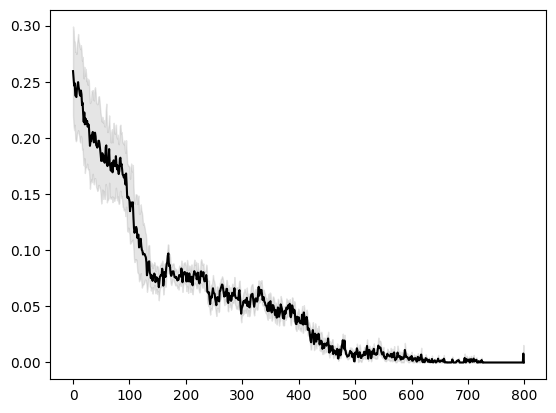

In [3]:
df = import_flyline("IS50_DP1-2bp", "karumbi/Caudal_Lines")
df_mod = df.apply(trim_data, axis = 1)
df_mean = df_mod.apply(np.mean)
df_bar = df_mod.apply(np.std) / np.sqrt(df_mod.shape[0])
df_up = df_mean + df_bar
df_down = df_mean - df_bar
plt = df_mean.plot(color = "black")
plt.fill_between(range(df_mean.shape[0]), df_up, df_down,
                 color='gray', alpha=0.2)
plt.plot()